In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [127]:
X = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,-1].values


In [128]:
print(X[0:3])
print(X.shape)

[[   19 19000]
 [   35 20000]
 [   26 43000]]
(400, 2)


In [129]:
print(y.shape)

(400,)


In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=5)

In [131]:
X_test.shape

(80, 2)

In [132]:
y_test.shape

(80,)

In [133]:
#Feature scaling

In [134]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train,y_train)
X_test = sc.transform(X_test)

In [135]:
X_train

array([[-0.27257222,  0.81711559],
       [-0.27257222,  1.14463175],
       [ 0.48837095,  1.26372853],
       [-1.12863329, -1.11820715],
       [-1.41398698, -0.64182001],
       [ 2.10537519, -0.82046519],
       [-1.69934067,  0.13230908],
       [-0.17745433, -0.28452966],
       [-0.27257222,  0.07276069],
       [-1.69934067,  0.48959944],
       [-0.17745433, -0.46317484],
       [ 1.6297857 ,  1.65079308],
       [-0.08233643,  0.31095426],
       [-0.08233643, -0.37385225],
       [-1.88957646, -0.52272323],
       [ 0.01278147,  0.0429865 ],
       [-0.27257222, -0.58227162],
       [-0.55792591,  1.41259951],
       [ 2.01025729,  2.18672861],
       [ 0.77372464, -1.23730393],
       [ 0.77372464, -1.38617491],
       [-0.9383975 , -0.7609168 ],
       [ 1.24931412, -1.38617491],
       [ 0.10789936,  1.08508336],
       [-0.27257222, -0.58227162],
       [-1.12863329,  0.48959944],
       [-1.03351539,  0.43005104],
       [-1.12863329,  0.31095426],
       [ 1.53466781,

In [136]:
X_test

array([[ 0.77372464,  0.7873414 ],
       [-1.79445856, -1.29685233],
       [-0.17745433, -0.52272323],
       [-1.31886908, -1.11820715],
       [ 0.10789936,  0.22163167],
       [-0.08233643,  0.0132123 ],
       [-0.36769012, -0.79069099],
       [ 0.39325305,  0.16208328],
       [-0.27257222, -0.49294903],
       [ 0.39325305,  0.28118006],
       [-0.17745433,  1.65079308],
       [-1.22375118,  0.60869622],
       [-0.8432796 ,  0.40027685],
       [-0.65304381, -0.10588448],
       [-0.27257222, -0.67159421],
       [-1.79445856, -1.32662652],
       [-0.27257222,  2.30582539],
       [ 0.20301726, -0.13565868],
       [-1.12863329,  0.34072846],
       [-0.08233643,  0.16208328],
       [ 0.96396043,  1.47214791],
       [ 0.10789936,  0.10253489],
       [ 2.10537519, -0.82046519],
       [ 0.29813516,  0.07276069],
       [ 0.67860674, -0.7311426 ],
       [-0.7481617 , -1.62436848],
       [ 0.20301726, -0.37385225],
       [ 1.91513939, -0.93956197],
       [ 1.15419622,

In [137]:
#Training the kernel SVM model on training set

In [138]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=4)
classifier.fit(X_train,y_train)

SVC(random_state=4)

In [139]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[49  4]
 [ 2 25]]
0.925


In [158]:
#Applying k-Fold Cross Validation

from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=False, random_state=5)
kf.fit(X_train, y_train)

In [185]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X_train, y=y_train, cv=10)
print('Accuracy: {:.2f} %'.format(accuracies.mean() * 100))
print('standard deviation: {:.2f} %',format(accuracies.std()*100))
#with this cross validation we can evaluate that how our prediction changes by taking the mean of kfolds 

Accuracy: 90.62 %
standard deviation: {:.2f} % 4.635124054434789


In [187]:
#Applying Grid Search to find the best model and the best parameters

In [183]:
from sklearn.model_selection import GridSearchCV
parameters = [
    {'C': [0.25, 0.50, 0.75,1], 'kernel':['linear']},
    {'C': [0.25,0.50,0.75,1], 'kernel':['rbf'],'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
]
grid_search = GridSearchCV(
    estimator = classifier, param_grid=parameters,scoring='accuracy',cv=10, n_jobs=-1
                
)
grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy * 100)
print(best_parameters)

90.9375
{'C': 1, 'gamma': 0.8, 'kernel': 'rbf'}


In [189]:
#visualizing on the training set 


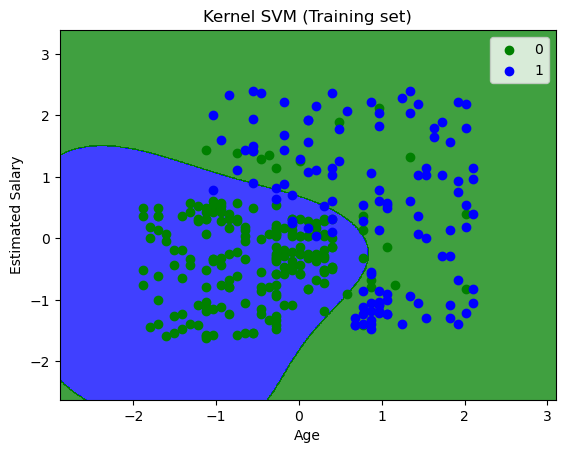

In [195]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color= ListedColormap(('green', 'blue'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [197]:
#training on the test set

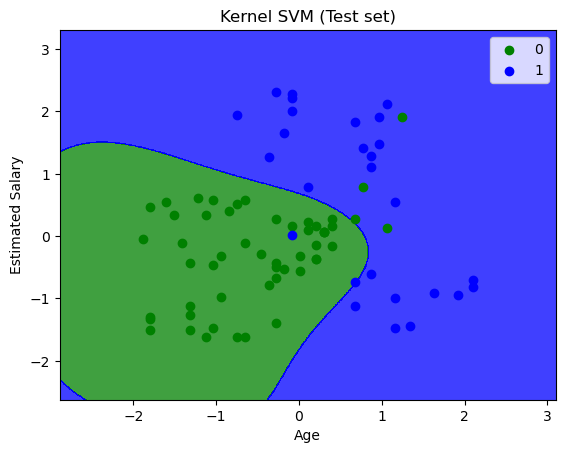

In [201]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('green', 'blue'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()